Fishing harvest parameters for the Salish Sea Atlantis Model

In [1]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd
from pathlib import Path
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from shapely.geometry import Point
import ssam_groups as groups
from ssam_groups import cohorts

In [29]:
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/')
scenario_paths = sorted([p for p in scenario_root.glob('highres_*/outputSalishSeaCATCH.nc')])
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]
for path in scenario_paths:
    print(path.parent.stem)

highres_fishery_closed_30d
highres_no_closure


In [50]:
def compare_scenario_catch(variable, box):
    fig, ax = plt.subplots(figsize = (14,3))
    names = []
    for scenario, path in zip(scenario_datasets, scenario_paths):
        names.append(path.parent.stem)
        catch = scenario.variables[variable+'_Catch'][:,box]
        time = scenario.variables['t']
        ax.plot(time, catch)
    ax.legend(names)
    ax.set_ylabel(variable + ' Catch (#)')
    #ax.set_title(pah, fontsize = 12);

In [76]:
def compare_cohort_catch(bio_group, scenario, name, boxes):
    label_size = 11
    font_size = 12
    line_width = 2

    time = scenario.variables['t']

    for species in bio_group:

        fig, ax = plt.subplots(figsize = (14,3))
        #ax.plot(event_start, 0, 'ok')

        numCohorts = cohorts[bio_group[species]]

        for cohort in range (1, numCohorts):

            new_species = bio_group[species] + str(cohort)
            catch_tb = scenario.variables[new_species + '_Catch'][:,boxes]
            catch = (catch_tb.sum(axis=1))
            ax.plot(time, catch, linewidth = line_width)
    
        ax.set_title(name, fontsize = font_size)
        ax.tick_params(labelsize=label_size)
        ax.set_ylabel(str(bio_group[species]) + ' Catch (#)')
        ax.legend(['cohort 1','cohort 2','cohort 3','cohort 4','cohort 5','cohort 6','cohort 7','cohort 8','cohort 9','cohort 10',]) #loc='center left'

In [34]:
box = 60
boxes = [66,60,33,34]

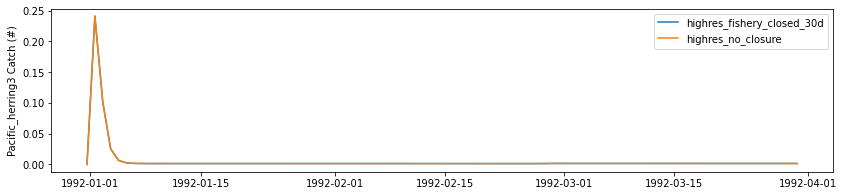

In [51]:
compare_scenario_catch('Pacific_herring3', box)

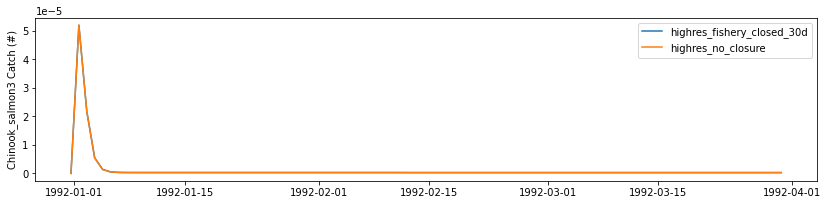

In [49]:
compare_scenario_catch('Chinook_salmon3', box)

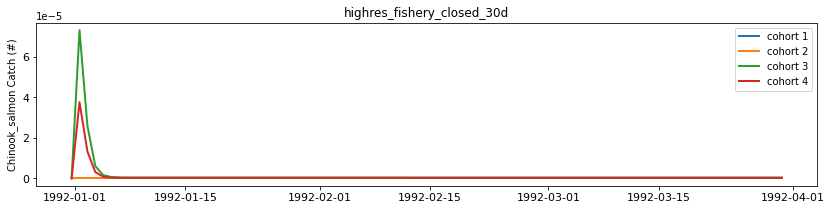

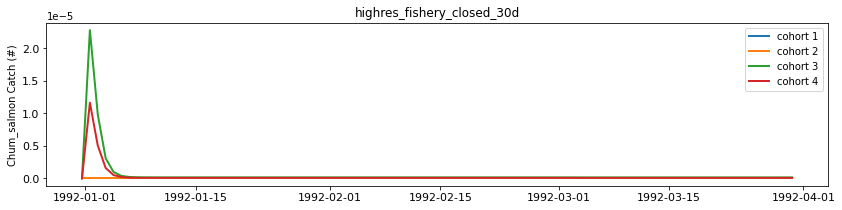

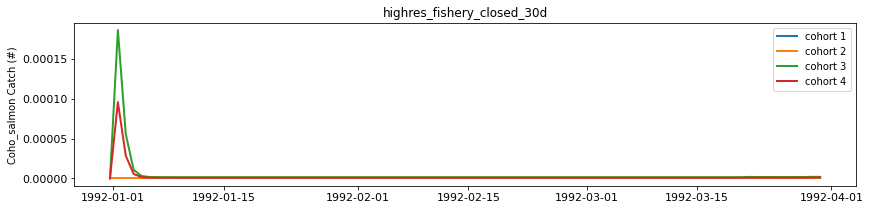

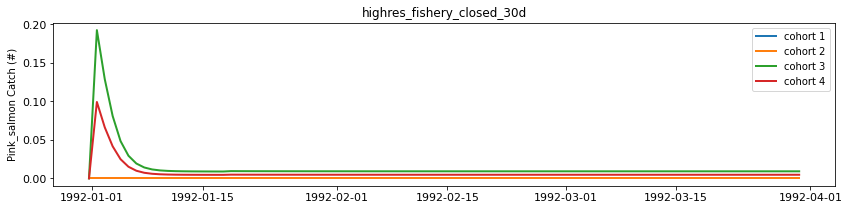

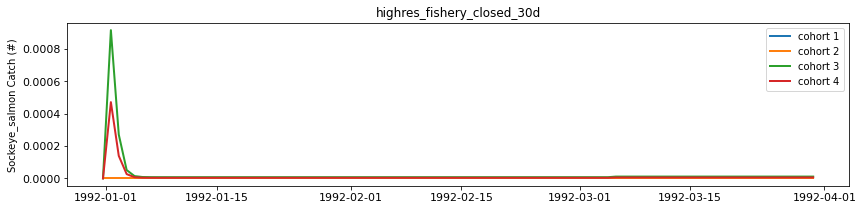

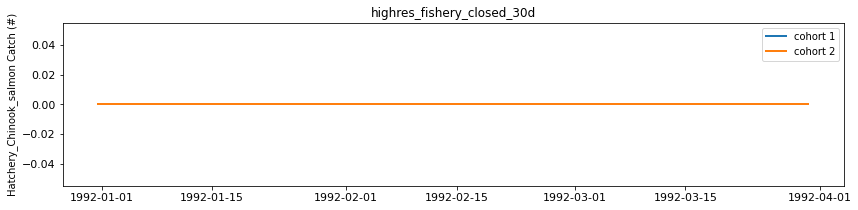

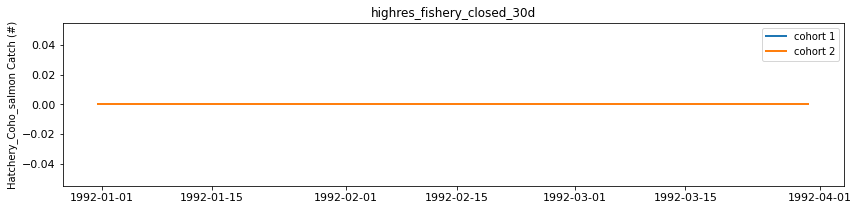

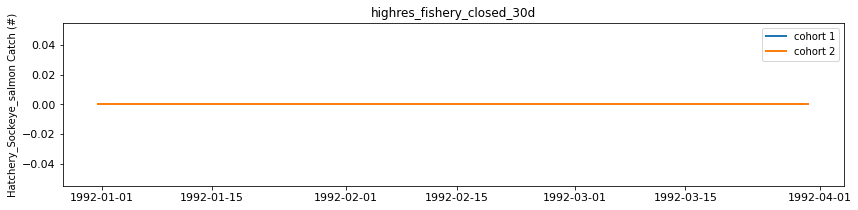

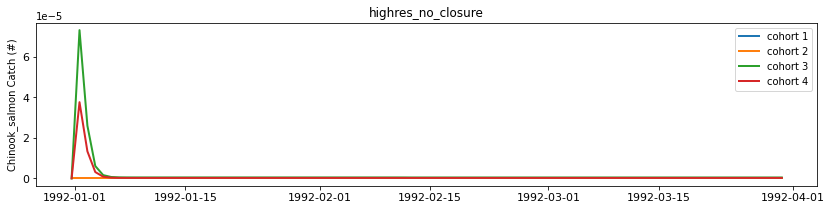

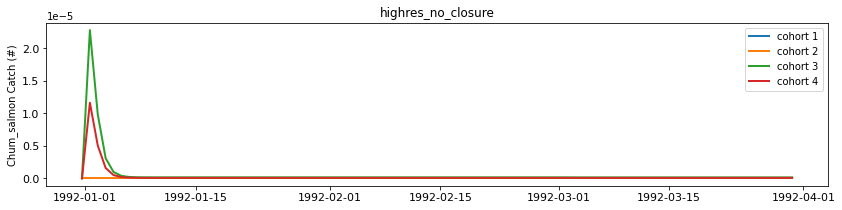

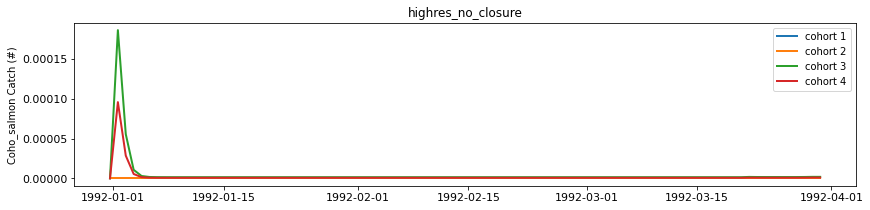

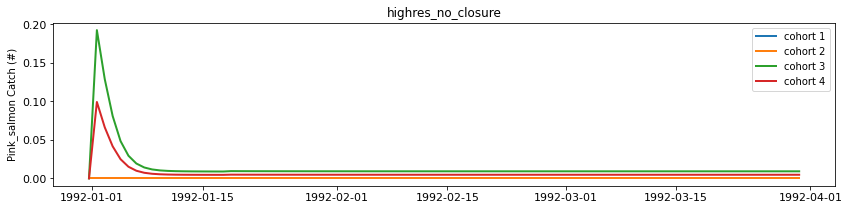

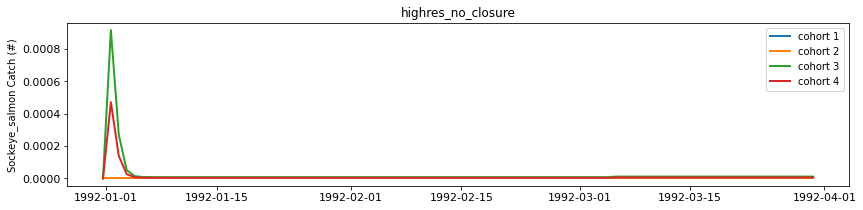

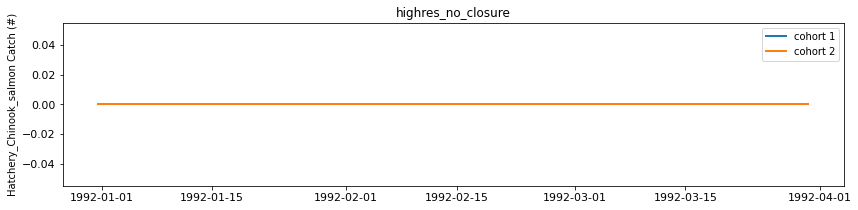

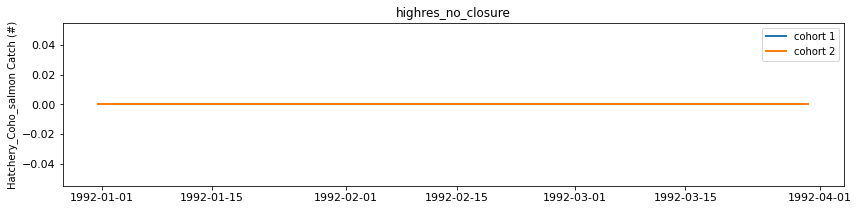

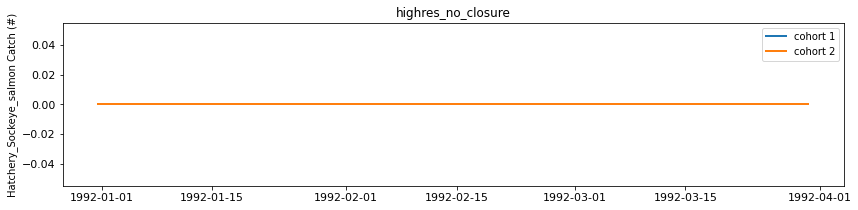

In [77]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    compare_cohort_catch(groups.salmon, scenario, path.parent.stem, boxes)

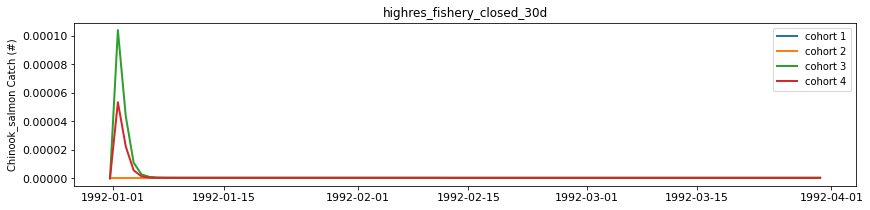

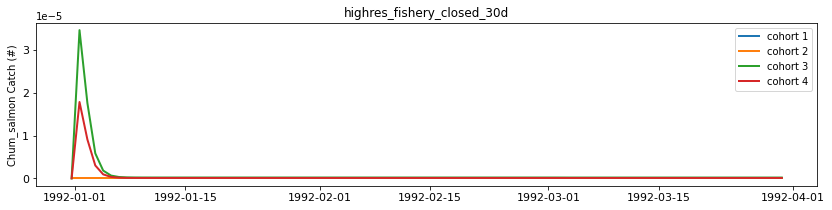

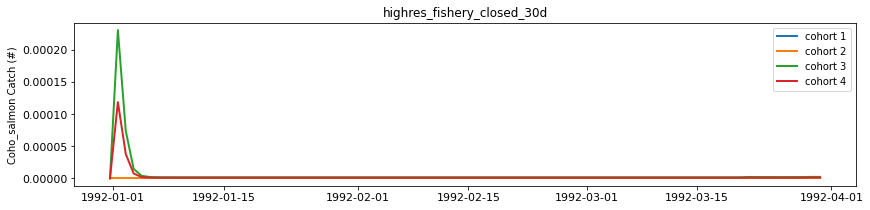

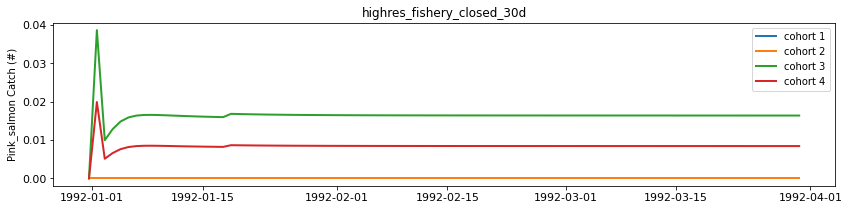

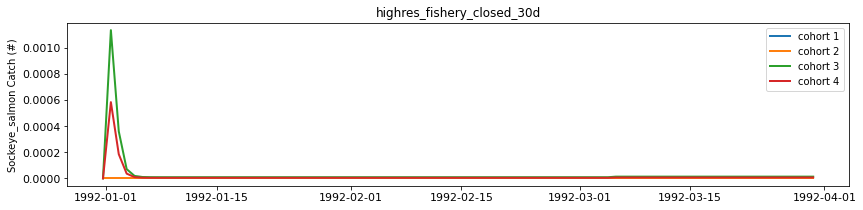

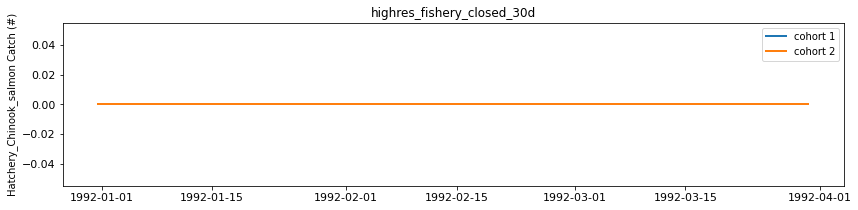

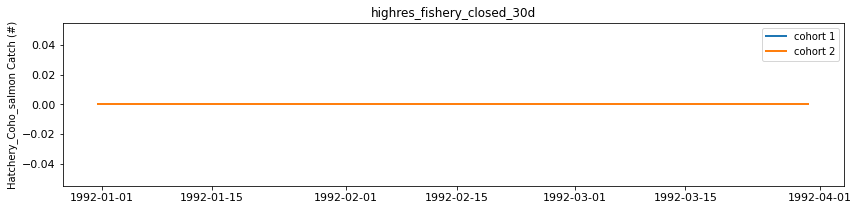

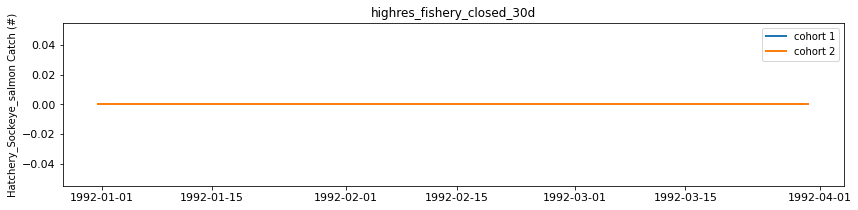

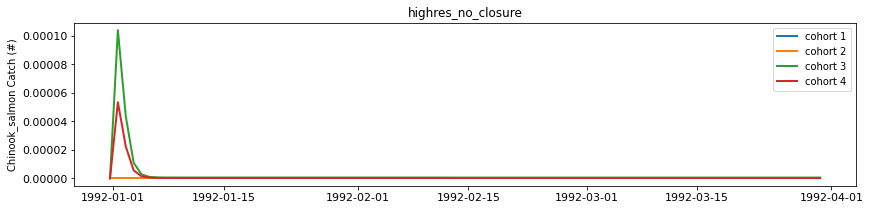

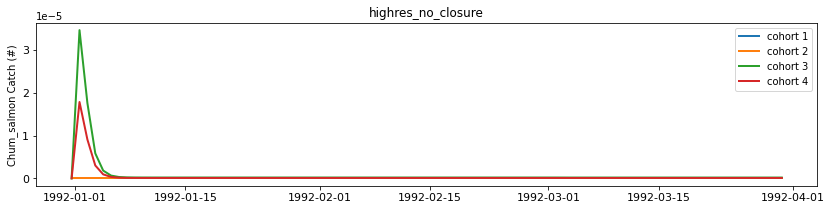

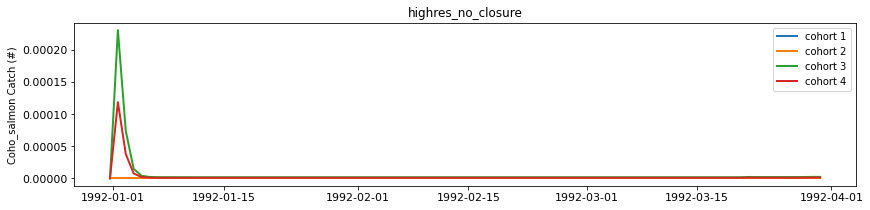

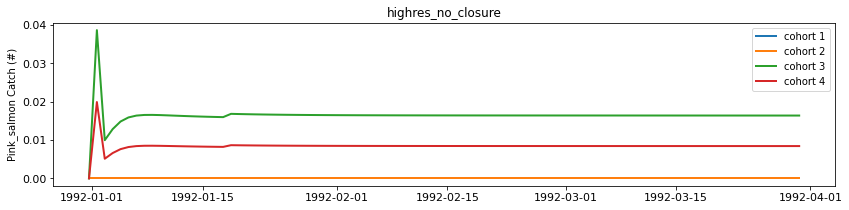

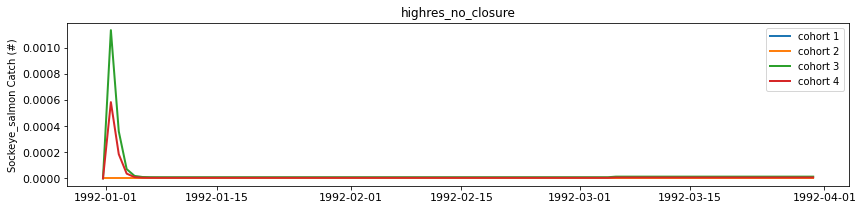

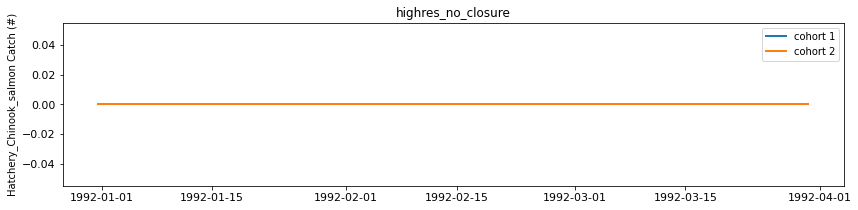

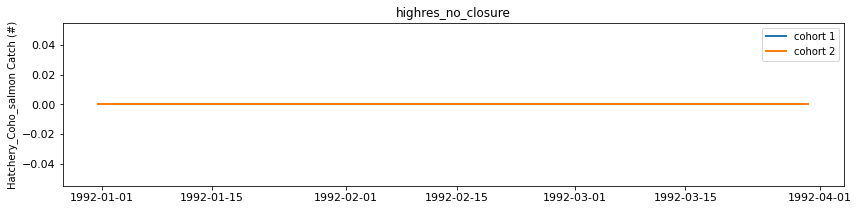

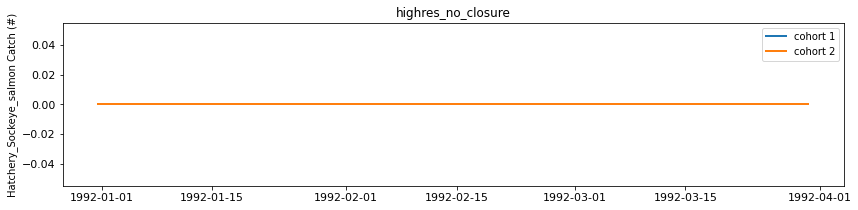

In [79]:
boxes_60 = [60,60]
for scenario, path in zip(scenario_datasets, scenario_paths):
    compare_cohort_catch(groups.salmon, scenario, path.parent.stem, boxes_60)

In [80]:
# Salish Sea Atlantis Shapefile
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)
data_df = data_df.sort_values(by=['BOX_ID'])
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]

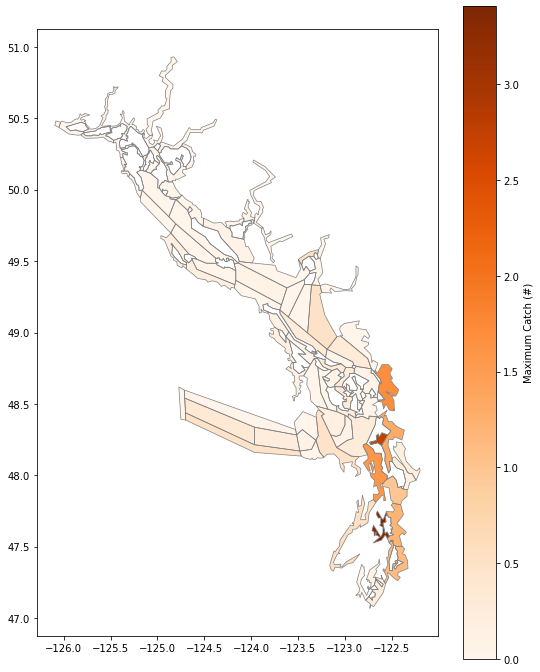

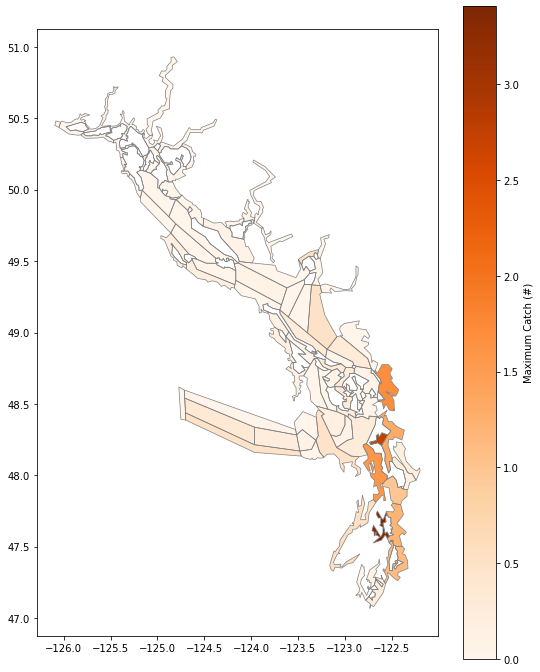

In [84]:
# Spatial plot of 2019 discharge

for scenario, path in zip(scenario_datasets, scenario_paths):
    catch = scenario.variables['Pink_salmon3_Catch']
    max_catch_per_box = catch.max(axis=0)
    _cmap = cm.Oranges
    land_df = data_df.loc[land_boxes]
        
    data_df['catch'] = max_catch_per_box
    data_df.loc[land_boxes, 'catch'] = 0
        
    ax = data_df.plot(figsize=(9, 12), column = 'catch', cmap=_cmap, 
        legend=True, legend_kwds={'label': "Maximum Catch (#)"
            },)
    land_df.plot(ax=ax, color='white')
    data_df.boundary.plot(ax=ax, color="grey", linewidths=0.7)